In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Read data from the file
file_path = 'data/merged_real_estate_listings.csv'
df = pd.read_csv(file_path)
df.head()

,Id,Date Posted,Product Title,Price,Area,Price per m²,calc price,Bedrooms,Toilets,Location,Coordinates
0,42211822,19/02/2025,"Bán nhà tập thể Giải Phóng, Hai Bà Trưng, sổ h...",3.650,110.0,33.18,0.000,3.0,2.0,"Bách Khoa, Hai Bà Trưng","21.0037155105872, 105.841410822568"
1,37893530,21/02/2025,Bán cắt lỗ - chung cư E1 Đại Cồ Việt - Đại học...,0.972,58.0,16.76,-0.002,2.0,2.0,"Bách Khoa, Hai Bà Trưng","21.0081158, 105.8460805"
2,42232438,21/02/2025,Bán căn hộ tập thể tầng 5 đã thông tầng 6 than...,3.500,100.0,35.00,0.000,4.0,3.0,"Bách Khoa, Hai Bà Trưng","21.0324711431819, 105.846972143071"
3,42011610,17/02/2025,"Bán tập thể Q100, Trần Đại Nghĩa, TT Hai Bà Tr...",4.150,79.0,52.53,0.000,2.0,1.0,"Bách Khoa, Hai Bà Trưng","21.0056090847596, 105.845461749236"
4,42178823,17/02/2025,"Chính chủ bán nhà tập thể Giải Phóng, Bách Kho...",3.600,90.0,40.00,0.000,3.0,2.0,"Bách Khoa, Hai Bà Trưng","21.0038440046303, 105.841051974364"


In [23]:
# 1. Descriptive Statistics
descriptive_stats = df[df['Price'] > 0].describe().round(2)
print("Descriptive Statistics:")
print(descriptive_stats)

Descriptive Statistics:
                Id    Price     Area  Price per m²  calc price  Bedrooms  \
count      7173.00  7173.00  7173.00       7173.00     7173.00   6980.00   
mean   41289309.88     7.14    95.18         71.41       -0.00      2.64   
std     2224406.13     7.06    46.03         37.22        0.00      1.58   
min     6809616.00     0.08    13.00          1.02       -0.01      1.00   
25%    41454519.00     4.05    70.00         53.45        0.00      2.00   
50%    42103319.00     5.80    85.50         65.00        0.00      2.00   
75%    42200394.00     8.00   110.00         81.00        0.00      3.00   
max    42248030.00   145.00   750.00        953.95        0.01     45.00   

       Toilets  
count  6740.00  
mean      2.09  
std       1.50  
min       1.00  
25%       2.00  
50%       2.00  
75%       2.00  
max      45.00  


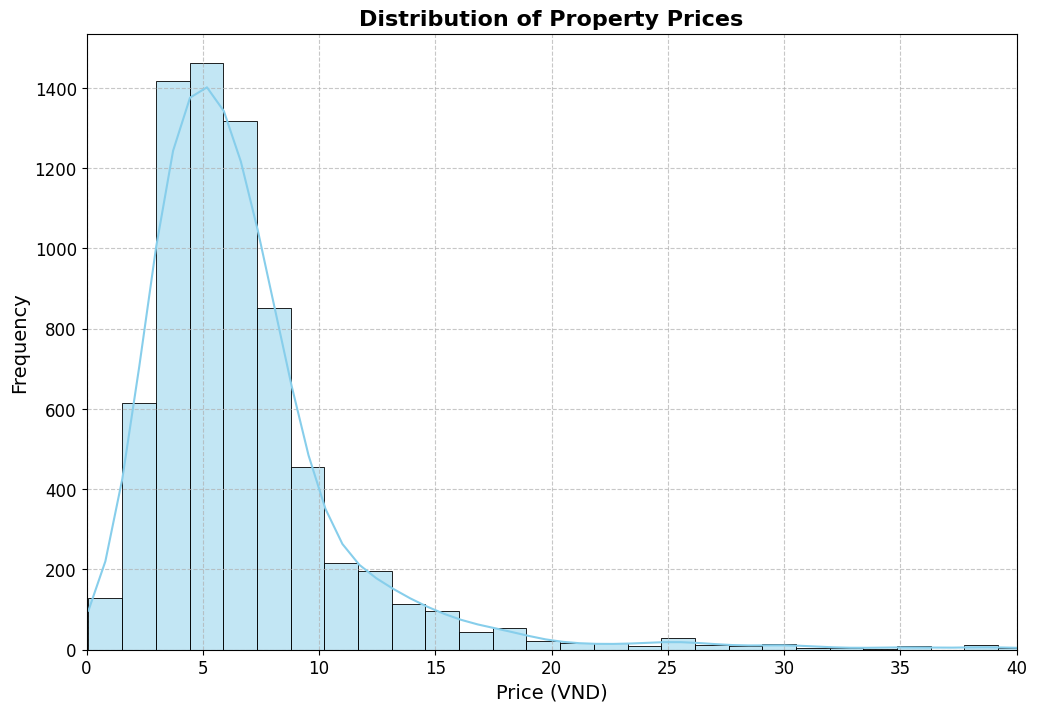

In [24]:
# 2. Price Distribution
plt.figure(figsize=(12, 8))
sns.histplot(df[df['Price'] > 0]['Price'], bins=100, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Property Prices', fontsize=16, fontweight='bold')
plt.xlabel('Price (VND)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 40)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

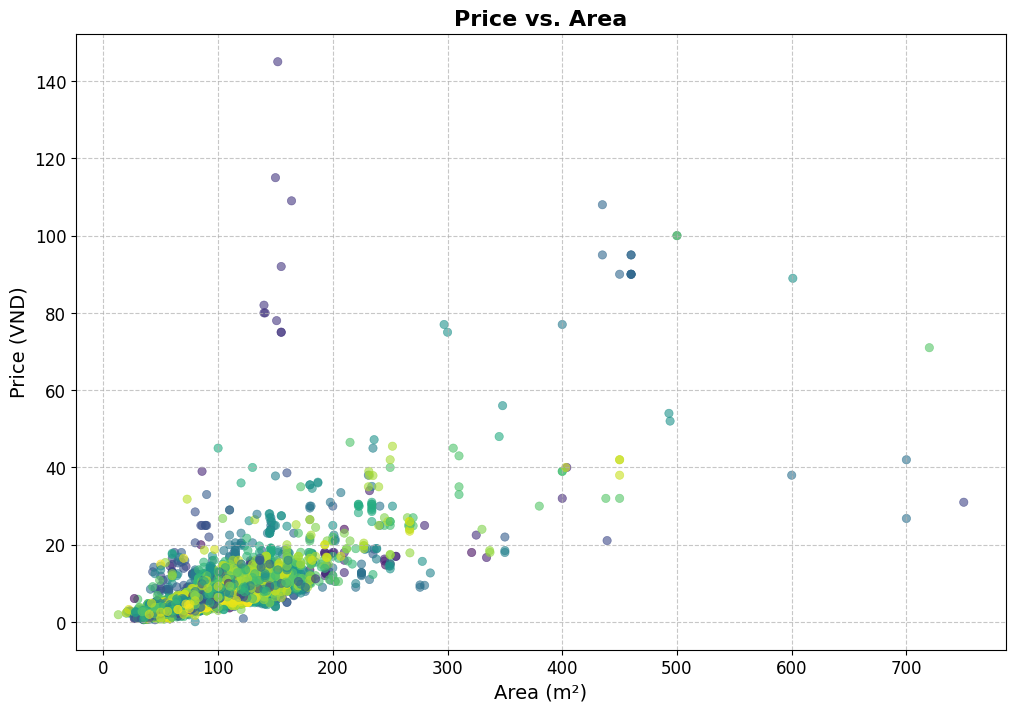

In [25]:
# 3. Price vs. Area
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Area', y='Price', data=df[df['Price'] > 0], hue='Location', palette='viridis', alpha=0.6, edgecolor=None)
plt.title('Price vs. Area', fontsize=16, fontweight='bold')
plt.xlabel('Area (m²)', fontsize=14)
plt.ylabel('Price (VND)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend([],[], frameon=False)  # Disable legend
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [26]:
# 5. Location Analysis
location_stats = df.groupby('Location').agg({'Price': 'mean', 'Area': 'mean'}).reset_index()
print("Location Analysis:")
print(location_stats)

Location Analysis:
                      Location     Price        Area
0     Bách Khoa, Hai Bà Trưng  3.896200   89.100000
1      Bạch Mai, Hai Bà Trưng  2.332000   54.800000
2    Bạch Đằng, Hai Bà Trưng  3.863846  144.692308
3                 Bưởi, Tây Hồ  4.953750   58.250000
4             Bồ Đề, Long Biên  7.594878  121.156098
..                         ...       ...         ...
128         Đội Cấn, Ba Đình  2.842143   66.642857
129         Đại Kim, Hoàng Mai  3.509178   80.940868
130       Định Công, Hoàng Mai  3.927258   76.804839
131                    Đống Đa  5.200000   66.333333
132       Đức Giang, Long Biên  3.727724   82.590732

[133 rows x 3 columns]
